### Importamos los módulos necesarios para el proyecto

In [1]:
import pandas as pd
import src.limpieza_texto as lt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos el dataset

In [2]:
data = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

###  Limpieza de los datos

#####  Durante todo el camino iremos limpiando el data set Attacks para ir viendo que datos nos sirven mejor

### Exportamos el dataset a la carpeta data "midatasetlimpio.csv"

In [3]:
data = pd.read_csv("data/attacks.csv", encoding='cp1252')

In [4]:
data = pd.DataFrame(data)

In [5]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Estudiaremos la evolucion de ataques de la especies durante años, donde se producen mas ataques y donde mueren mas personas

### Vamos a ver el tamaño del data Attacks y el tipo de datos

In [6]:
data.shape

(25723, 24)

In [7]:
data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

### Vemos las columnas que tiene para ver que podemos limpiar

In [8]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

 ### Vamos a a ver que contienen las columnas Unnamed 22 y 23

In [9]:
data['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [10]:
data['Unnamed: 23'].value_counts()

change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64

### No contienen datos importantes, las podemos quitar

In [11]:
data = data.drop(columns=['Unnamed: 22','Unnamed: 23'])

In [12]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


### Hay columnas que contienen PDFS y URLS que no nos van a ser útiles

In [13]:
pdf_columns = data.loc[:, ['pdf', 'href formula', 'href']]
pdf_columns.head()

,pdf,href formula,href
0,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [14]:
data = data.drop(columns=['pdf','href formula', 'href'])

In [15]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04,2018.06.04,6299.0


### Las columnas Case Number no tienen importancia 

In [16]:
order_columns = data.loc[:, ['Case Number', 'Case Number.1', 'Case Number.2', 'original order']]
order_columns.head()

,Case Number,Case Number.1,Case Number.2,original order
0,2018.06.25,2018.06.25,2018.06.25,6303.0
1,2018.06.18,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2018.06.09,2018.06.09,6301.0
3,2018.06.08,2018.06.08,2018.06.08,6300.0
4,2018.06.04,2018.06.04,2018.06.04,6299.0


In [17]:
data = data.drop(columns=['Case Number', 'Case Number.1', 'Case Number.2', 'original order'])
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


### La columna Investigator no nos será útil ya que hemos limpiado los casos

In [18]:
data_shark = data.drop(columns=['Investigator or Source'])
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


### Ahora procedemos a ver los datos nulos del data set

In [19]:
data.isnull().sum()


Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
dtype: int64

### Vamos a eliminar filas donde todos los datos sean Nulos

In [20]:
data = data.dropna(how='all')
data.head(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


### Ahora vamos a eliminar los datos nulos de las columnas que usaremos

#####  Para ver los ataques de tiburones usaremos las columnas fatal y especies

###### Cambiamos los nombres y el orden de las columnas

In [21]:
data = data.rename(columns={'Fatal (Y/N)':'Fatal',
                           'Species ': 'Species'})

In [22]:
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


### Cambiamos el orden de las columnas para que sea nas útil

In [23]:
cambio =['Date','Country', 'Species', 'Injury', 'Fatal',]
data = data[cambio]
data.head()

,Date,Country,Species,Injury,Fatal
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [24]:
data.shape

(6302, 5)

### Vamos a ver los paises del data set

In [25]:
data.Country

0                      USA
1                      USA
2                      USA
3                AUSTRALIA
4                   MEXICO
               ...        
6297             AUSTRALIA
6298             AUSTRALIA
6299                   USA
6300                PANAMA
6301    CEYLON (SRI LANKA)
Name: Country, Length: 6302, dtype: object

In [26]:
ataque = data[
                ((data['Country']=='USA') | 
                (data['Country']=='AUSTRALIA') |
                 (data['Country']=='PANAMA') |
                 (data['Country']=='MEXICO') |
                 (data['Country']=='CEYLON') |
                (data['Country']=='SOUTH AFRICA'))
               ]
 
ataque.head(5)

,Date,Country,Species,Injury,Fatal
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N


<AxesSubplot:title={'center':'Ataque de todas las especies'}, xlabel='Country'>

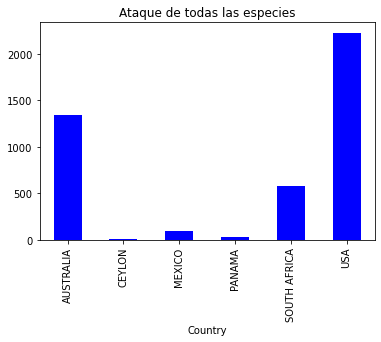

In [27]:
ataque.groupby(['Country']).size().plot(kind='bar',stacked=True, 
                                          title="Ataque de todas las especies", color="blue")

In [28]:
data.head()

,Date,Country,Species,Injury,Fatal
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [30]:
ataque_mortal = ataque.groupby(["Country", "Fatal"]).agg({"Country":"count"})
ataque_mortal

Country
Country      Fatal           
AUSTRALIA     N             5
             N            915
             N              1
             UNKNOWN       21
             Y            283
CEYLON       Y              3
MEXICO       N             35
             Y             43
PANAMA       N             13
             Y             18
SOUTH AFRICA N            407
             UNKNOWN        2
             Y            106
USA          N           1837
             UNKNOWN       18
             Y            186

<AxesSubplot:title={'center':'Ataques Mortales'}, xlabel='Country'>

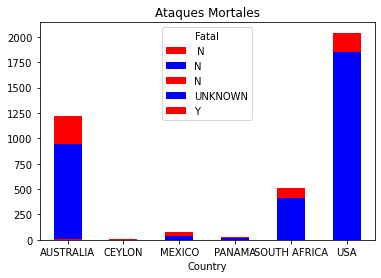

In [31]:
ataque.groupby(['Country','Fatal']).size().unstack().plot(kind='bar',stacked=True, rot=0, title="Ataques Mortales", color=["red","blue"])
                                                                  


In [32]:
data.head()

,Date,Country,Species,Injury,Fatal
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N


### Vamos a ver la evolucion de ataques desde el año 2000

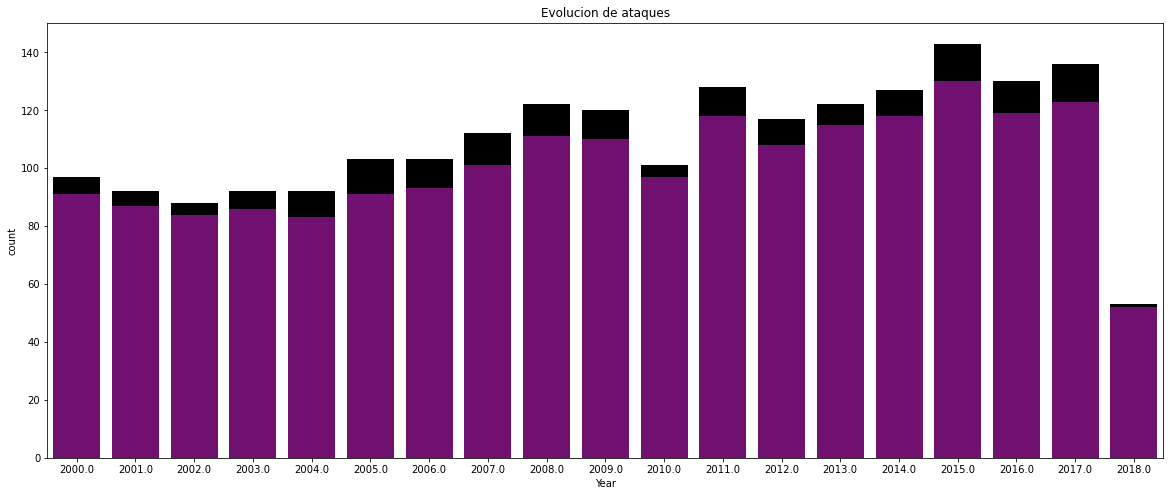

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Evolucion de ataques")

graf_1 = sns.countplot(x="Year", data=data[data["Year"] >= 2000], label="all", color="black")
graf_2 = sns.countplot(x="Year", data=data[(data["Year"] >= 2000) & (data["Fatal (Y/N)"])], 
                  label="all", color="purple")

In [5]:
data = data.to_csv('data_nuevo.csv')